# training 10 features to 1 class 
## one vs all
    Gryf

In [78]:
import numpy as np
import pandas as pd

df = pd.read_csv(f'../datasets/dataset_train.csv')
df_class = df['Hogwarts House']
df_class.head()

# df['Hogwarts House'] works for only 1 col

,Index,Hogwarts House
0,0,Ravenclaw
1,1,Slytherin
2,2,Ravenclaw
3,3,Gryffindor
4,4,Gryffindor


In [37]:
df_features = df[df.columns[6:]]
df_features.head()
# removed non_num = ['Index', 'First Name', 'Last Name', 'Birthday', 'Best Hand',]

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


<Axes: xlabel='Astronomy', ylabel='Defense Against the Dark Arts'>

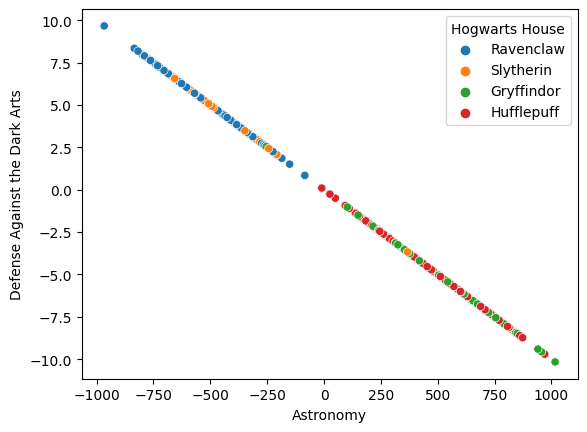

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
 data=df, 
 x="Astronomy",
 y="Defense Against the Dark Arts",
 hue="Hogwarts House",
 legend='auto'
)

Removing

<Axes: xlabel='Hogwarts House', ylabel='Arithmancy'>

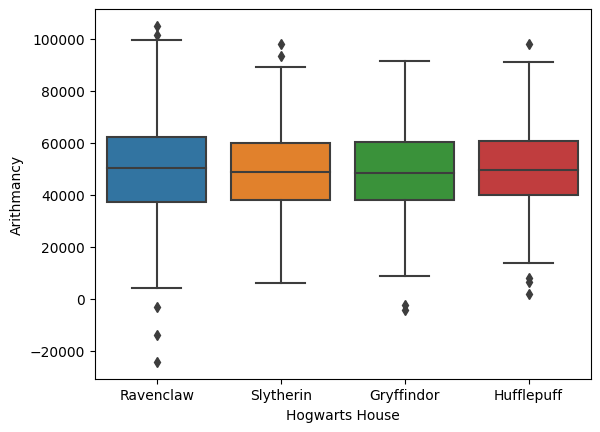

In [39]:
sns.boxplot(data=df, x="Hogwarts House", y="Arithmancy")

<Axes: xlabel='Hogwarts House', ylabel='Care of Magical Creatures'>

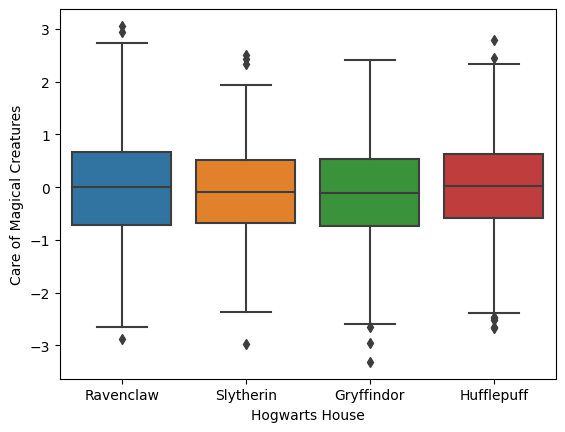

In [40]:
sns.boxplot(data=df, x="Hogwarts House", y="Care of Magical Creatures")

    Only the meaningful variables should be included.
    The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

In [53]:
excluded_features = ["Arithmancy", "Defense Against the Dark Arts", "Care of Magical Creatures"]
df_features = df_features.drop(excluded_features, axis=1)
df_features.head()


,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
0,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89
1,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45
2,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42
3,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64
4,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98


In [54]:
features = df_features.columns.to_list()
print(features)

['Astronomy', 'Herbology', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Charms', 'Flying']


Standardization
```df_features```
apply along axis

In [56]:
df_features.apply(np.mean) #axis=0


Astronomy             39.797131
Herbology              1.141020
Divination             3.153910
Muggle Studies      -224.589915
Ancient Runes        495.747970
History of Magic       2.963095
Transfiguration     1030.096946
Potions                5.950373
Charms              -243.374409
Flying                21.958012
dtype: float64

In [57]:
def standardize(arr:np.ndarray):
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr - mean) / std

df_std_features = df_features.agg(lambda course:standardize(course))
df_std_features.describe()

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
count,1.568000e+03,1.567000e+03,1.561000e+03,1.565000e+03,1.565000e+03,1.557000e+03,1.566000e+03,1.570000e+03,1.600000e+03,1.600000e+03
mean,-1.132881e-17,-3.188260e-17,5.234620e-17,-2.043094e-17,3.189497e-16,-1.825415e-17,-3.799997e-15,6.109762e-17,-7.849277e-16,2.220446e-17
std,1.000319e+00,1.000319e+00,1.000320e+00,1.000320e+00,1.000320e+00,1.000321e+00,1.000319e+00,1.000319e+00,1.000313e+00,1.000313e+00
min,-1.935157e+00,-2.191768e+00,-2.860134e+00,-1.772780e+00,-1.994127e+00,-2.672049e+00,-2.799065e+00,-3.383654e+00,-2.012837e+00,-2.084280e+00
25%,-1.017719e+00,-1.044305e+00,-1.321860e-02,-7.260343e-01,-9.245723e-01,-1.682599e-01,-8.811751e-02,-7.320294e-01,-8.288667e-01,-6.539683e-01
50%,4.239158e-01,4.461451e-01,3.539001e-01,-4.002028e-01,-2.995699e-01,3.198391e-01,3.493469e-01,-2.400356e-02,-1.700688e-01,-2.507453e-01
75%,9.324066e-01,8.198832e-01,6.049852e-01,9.864155e-01,9.575822e-01,6.469075e-01,6.424576e-01,7.301900e-01,1.232460e+00,2.930499e-01
max,1.877243e+00,2.006869e+00,1.655787e+00,2.708777e+00,2.349604e+00,2.017610e+00,1.561089e+00,2.410787e+00,2.043786e+00,2.634315e+00


<Axes: >

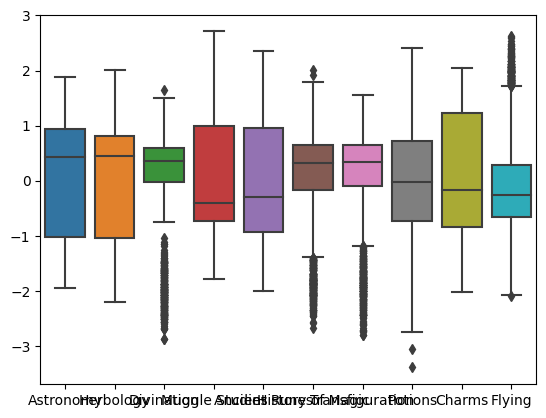

In [62]:
sns.boxplot(data=df_std_features)

Remove duplicates if any
remove full na row if any

In [66]:
df['Hogwarts House'].unique()

array(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'], dtype=object)

In [68]:
x_train = np.array(df_std_features)
weights = np.ones(len(features))
np.dot(x_train, weights)

array([ 2.35945213, -7.4247784 ,  8.27919807, ..., -2.41045225,
       -0.68540716,  0.37895327])

In [84]:
# array 
houses = df['Hogwarts House'].unique()
houses[0]


'Ravenclaw'

In [91]:
houses = df['Hogwarts House'].unique()
houses[0]
# gives bool : df['Hogwarts House'] == houses[0]
np.where(df['Hogwarts House'] == houses[0], 1, 0)

array([1, 0, 1, ..., 0, 0, 0])

self.features : check that features are unique
if len(features) == len(unique(features))
    OK

In [ ]:
class LogRegTrain:
    def __init__(self, df_to_train, df_class):
        ''' standardize df to tarin'''
        df_std_features = df_features.agg(lambda feature:LogRegTrain.standardize(feature)
        self.df_std_features = df_std_features
        self.x_train = np.array(df_std_features)  
        self.features = df_std_features.columns.to_list()
        self.df_class = df_class
        self.house = df_class.unique()

    def train_one_vs_all(self, house):
        self.weights = np.ones(len(self.features))
        y = np.where(self.df_class] == house, 1, 0)
        for iter in range(self.epochs):
            output = np.dot(x_train, self.weights) 
        #self.x_train = np.array(self.df_train[feature]))  

    def train(self, learning_rate=0.1, epochs=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        #for house in self.house:
            # y = np.where(self.df_class[1] == house, 1, 0)
            #self.train_one_vs_all(house)
        self.train_one_vs_all(self.house[0])


    @staticmethod
    def standardize(arr:np.ndarray):
        mean = np.mean(arr)
        std = np.std(arr)
        return (arr - mean) / std


def main():
    # unstandardized data to train
    my_model = LogRegTrain(df_features, df_class)